In [1]:
# Import modules
import os
import sys
sys.path.append(r'..\Hardware_src') # Make the change according to your path

# Python modules for figure visualization
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import io
from scipy import signal
import math
import cv2
import screeninfo
from scipy.linalg import hadamard    


In [2]:
from camera import Camera
import thorlabs_apt as apt
from Stage import  LinearStage

# Instantiate Camera and Linear Stage
c = Camera()
c.open()
c.initialize_memory()

myLinearStage = LinearStage(apt)

Load uc480 library..
ThorCam opened successfully.


In [4]:
# Aperture f/1.6, focus 0.2
# Set the pixel clock
c.set_pixel_clock(7)

# Set exposure - 
c.set_exposure(10)

# # Set the imaging ROI (in raw measurement view)
roi_shape = [1280,1024] # ROI size MUST BE MULTIPLE OF 4
roi_pos = [0,0] # The location of top-left corner of AOI on axis 0 and 1;
                     # Full size is (1280,1024)
c.set_roi(roi_shape, roi_pos)

In [5]:
# Get stage info
myLinearStage.get_properties()

# Get stage to home position
myLinearStage.home()

# Set desired acceleration and velocity
accn = 1000
vel = 150
myLinearStage.set_velocity(accn, vel)

Serial Number 	 67864625
Position Range 	 [0.0, 100.0]  mm
Unit 	 mm
Maximum allowed acceleration 	 2000.0
Maximum allowed velocity 	 250.0


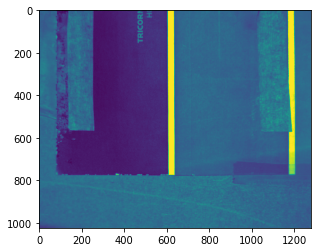

In [6]:
myLinearStage.move_to(40)
img = c.capture().copy()
plt.imshow(img)

## 1D Identity Patterns

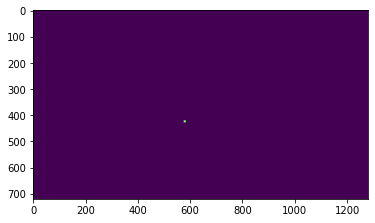

In [18]:
N = 16 # dimensions of reconstruction (pixel height/width)
M = N**2 # number of single pixel images
screen = screeninfo.get_monitors()[1]
width, height = screen.width, screen.height
black = np.zeros((height,width))
pattern = np.zeros((height,width,M))

# Generate speckle patterns
specks = np.zeros((N,N,16))
for i in range(16):
#     speck = np.random.normal(0, 1, size=(N, N))
#     speck[speck>0.5] = 1
#     speck[speck<=0.5] = 0
    speck = np.zeros((N,N))
    speck[8,i] = 1
    speck_up = np.repeat(speck, 8, axis=1).repeat(8, axis=0)
    specks[:,:,i] = np.copy(speck)
    pattern[int(height/2-M/2+50+64+10):int(height/2+M/2+50-64+10),int(width/2-M/2+64):int(width/2+M/2-64),i] = np.copy(speck_up)

plt.imshow(pattern[:,:,0])

## 1D Random Speckles

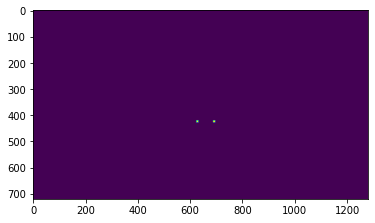

In [36]:
N = 16 # dimensions of reconstruction (pixel height/width)
M = N**2 # number of single pixel images
screen = screeninfo.get_monitors()[1]
width, height = screen.width, screen.height
black = np.zeros((height,width))
pattern = np.zeros((height,width,M))

# Generate speckle patterns
specks = np.zeros((N,N,16))
for i in range(16):
    speck = np.zeros((N,N))
    speck[8,:] = np.random.normal(0, 1, size=(1, N))
    speck[speck>0.5] = 1
    speck[speck<=0.5] = 0
    speck_up = np.repeat(speck, 8, axis=1).repeat(8, axis=0)
    specks[:,:,i] = np.copy(speck)
    pattern[int(height/2-M/2+50+64+10):int(height/2+M/2+50-64+10),int(width/2-M/2+64):int(width/2+M/2-64),i] = np.copy(speck_up)

plt.imshow(pattern[:,:,0])

## 2D Identity Patterns


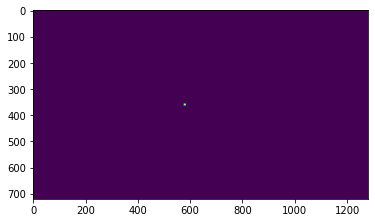

In [7]:
N = 16 # dimensions of reconstruction (pixel height/width)
M = N**2 # number of single pixel images
screen = screeninfo.get_monitors()[1]
width, height = screen.width, screen.height
black = np.zeros((height,width))
pattern = np.zeros((height,width,M))

# Generate speckle patterns
specks = np.zeros((N,N,M))
count=0
for i in range(N):
    for j in range(N):
        speck = np.zeros((N,N))
        speck[i,j] = 1
        speck_up = np.repeat(speck, 8, axis=1).repeat(8, axis=0)
        specks[:,:,count] = np.copy(speck)
        pattern[int(height/2-M/2+50+64+10):int(height/2+M/2+50-64+10),int(width/2-M/2+64):int(width/2+M/2-64),count] = np.copy(speck_up)
        count+=1
plt.imshow(pattern[:,:,0])

## 2D Random Speckles

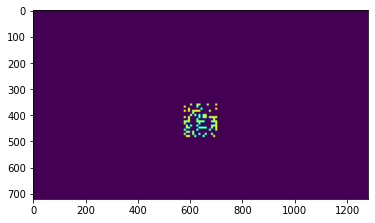

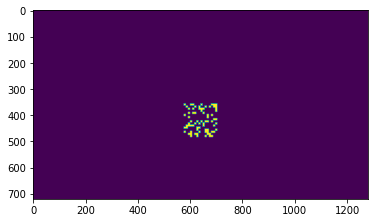

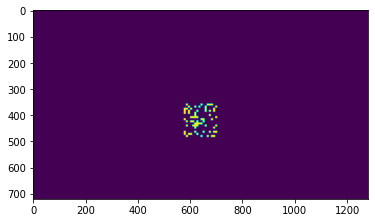

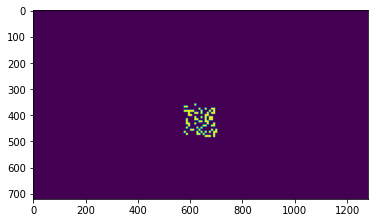

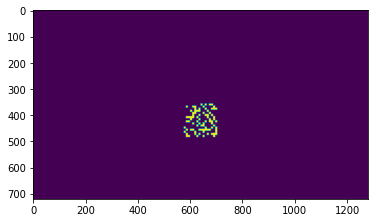

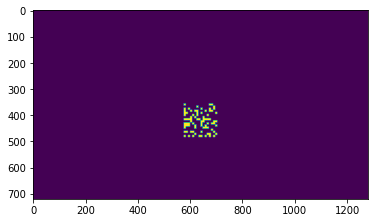

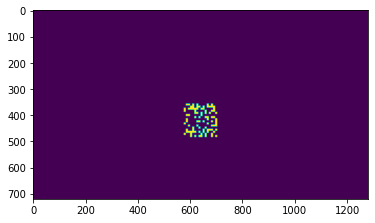

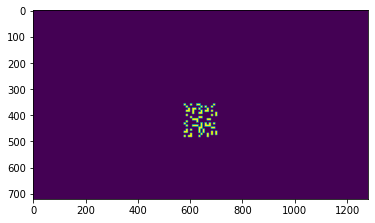

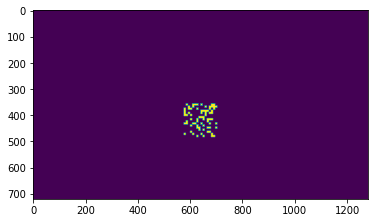

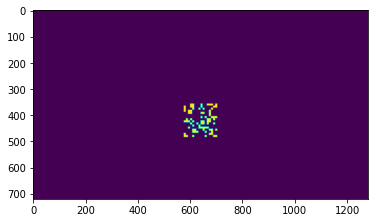

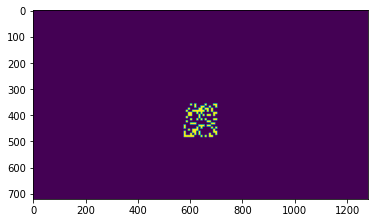

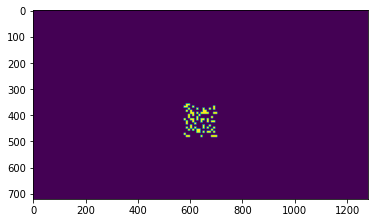

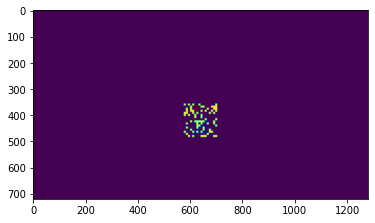

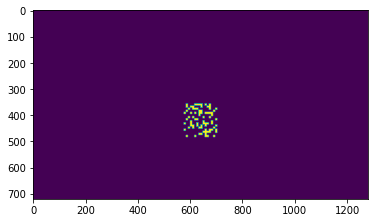

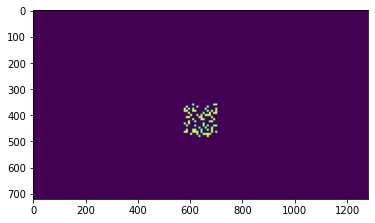

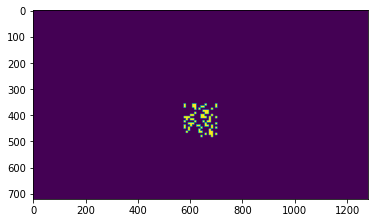

IndexError: index 16 is out of bounds for axis 2 with size 16

In [13]:
N = 16 # dimensions of reconstruction (pixel height/width)
M = N**2 # number of single pixel images
screen = screeninfo.get_monitors()[1]
width, height = screen.width, screen.height
black = np.zeros((height,width))
pattern = np.zeros((height,width,M))

# Generate speckle patterns
specks = np.zeros((N,N,16))
for i in range(256): # change to 256?
    speck = np.random.normal(0, 1, size=(N, N))
    speck[speck>0.5] = 1
    speck[speck<=0.5] = 0
    speck_up = np.repeat(speck, 8, axis=1).repeat(8, axis=0)
    specks[:,:,i] = np.copy(speck)
    pattern[int(height/2-M/2+50+64+10):int(height/2+M/2+50-64+10),int(width/2-M/2+64):int(width/2+M/2-64),i] = np.copy(speck_up)
    plt.imshow(pattern[:,:,i])
    plt.show()

## Test projected images

In [14]:
c.set_framerate(17)

image = pattern[:,:,15]
image[0, 0] = 0  # top-left corner
image[height - 2, 0] = 0  # bottom-left
image[0, width - 2] = 0  # top-right
image[height - 2, width - 2] = 0  # bottom-right

window_name = 'projector'
cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)
cv2.moveWindow(window_name, screen.x - 1, screen.y - 1)
cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN,
                      cv2.WINDOW_FULLSCREEN)
cv2.imshow(window_name, image)

# c.live_image()

cv2.waitKey(50000)  #50000

cv2.destroyWindow(window_name)

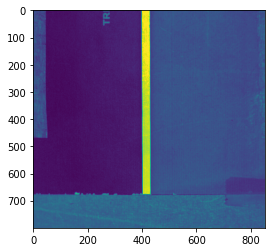

In [29]:
roi_shape = [852,800] # ROI size MUST BE MULTIPLE OF 4
roi_pos = [200,100] # The location of top-left corner of AOI on axis 0 and 1;
                     # Full size is (1280,1024)
c.set_roi(roi_shape, roi_pos)
img = c.capture().copy()

# imgc = img[100:900,200:1050]
plt.imshow(img)

## Capture images with projected patterns

In [10]:
myLinearStage.move_to(40)
scene = np.zeros((1024,1280,M))
# black_subtract = np.zeros((1024,1280,M))
# scene = np.zeros((M))
# black_subtract = np.zeros((M))

# Create image and display on projector
for i in range(M):
    # Display speckle image
    image = pattern[:,:,i]
    image[0, 0] = 0  # top-left corner
    image[height - 2, 0] = 0  # bottom-left
    image[0, width - 2] = 0  # top-right
    image[height - 2, width - 2] = 0  # bottom-right

    window_name = 'projector'
    cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)
    cv2.moveWindow(window_name, screen.x - 1, screen.y - 1)
    cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN,
                          cv2.WINDOW_FULLSCREEN)
    cv2.imshow(window_name, image)
        
    cv2.waitKey(500)
    
    # Take picture of object w/ speckle pattern
    scene[:,:,i] = c.capture().copy()
#     scene[i] = np.mean(c.capture().copy())
    
    cv2.destroyWindow(window_name)
    
#     # Display black image
#     image = black[:,:]
#     image[0, 0] = 0  # top-left corner
#     image[height - 2, 0] = 0  # bottom-left
#     image[0, width - 2] = 0  # top-right
#     image[height - 2, width - 2] = 0  # bottom-right

#     window_name = 'projector'
#     cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)
#     cv2.moveWindow(window_name, screen.x - 1, screen.y - 1)
#     cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN,
#                           cv2.WINDOW_FULLSCREEN)
#     cv2.imshow(window_name, image)
        
#     cv2.waitKey(500)
    
#     # Take picture of object w/ black projection
#     black_subtract[:,:,i] = c.capture().copy()
# #     black_subtract[i] = np.mean(c.capture().copy())
    
#     cv2.destroyWindow(window_name)
    print(i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255


## Loop with output as single pixels


In [ ]:
# CHECKLIST
# 1) Camera view is cropped
# 2) Black image also cropped to same ROI
# 3) Check names for Y to save

myLinearStage.move_to(40)

scene = np.zeros(()) # Set dimension to ROI dimensions
M = 128 # Set number of images to be acquired (N = 256)
Y = np.zeros(M) # Can change variable name depending on mask

# Create image and display on projector
for i in range(M):
    # Display speckle image
    image = pattern[:,:,i]
    image[0, 0] = 0  # top-left corner
    image[height - 2, 0] = 0  # bottom-left
    image[0, width - 2] = 0  # top-right
    image[height - 2, width - 2] = 0  # bottom-right

    window_name = 'projector'
    cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)
    cv2.moveWindow(window_name, screen.x - 1, screen.y - 1)
    cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN,
                          cv2.WINDOW_FULLSCREEN)
    cv2.imshow(window_name, image)
        
    cv2.waitKey(500)
    
    # Take picture of object w/ speckle pattern
    scene = c.capture().copy()
    Y[i,0] = np.sum(scene - blackimg) # Subtracts black image and saves as single pixel information into Y vector
    
    cv2.destroyWindow(window_name)
    print(i)
    

In [ ]:
# Subtract "black" image

Y = np.zeros((M))
scene_pix = np.zeros((M))
black_subtract_pix = np.zeros((M))
for i in range(M):
#     scene_pix[i] = np.mean(scene[:,:,i])
#     black_subtract_pix[i] = np.mean(black_subtract[:,:,i])
    Y[i] = scene[i] - black_subtract[i]
    

In [ ]:
Y = Y.reshape(M,1)
C = np.zeros((M,M))
for i in range(M):
    C[i,:] = specks[:,:,i].copy().flatten()
#     C[i,:] = specks[:,:,i].copy().reshape(1,N*N)
    C_pinv = np.linalg.pinv(C)
    
recovery1 = np.dot(C_pinv, Y)
recovery1 = recovery1.reshape(N,N)
plt.imshow(recovery1, cmap='gray')
plt.colorbar()

In [ ]:
np.savetxt('recovery1.csv',recovery.reshape(16,16),delimiter=',')
np.savetxt('speckles1.csv',specks.reshape(16,4096),delimiter=',')
np.savetxt('scene1.csv',scene,delimiter=',')
np.savetxt('black_subtract1.csv',black_subtract,delimiter=',')

In [ ]:
# scene = np.loadtxt('scene1.csv',delimiter=',')
np.savetxt('recovery_fixed1.csv',recovery.reshape(16,16),delimiter=',')
# np.savetxt('black_subtract_fixed.csv',black_subtract,delimiter=',')
#recovery_fixed is with flatten function, recovery_fixed1 is with reshape function

In [15]:
np.savetxt('scene_2d_59.csv',scene.reshape(1024,327680),delimiter=',')
# np.savetxt('black_subtract_2d_59.csv',black_subtract.reshape(1024,327680),delimiter=',')
np.savetxt('mask_2d_59.csv',specks.reshape(16,4096),delimiter=',')

In [48]:
16*1280

20480

In [11]:
blackimg = np.zeros((height,width))
window_name = 'projector'
cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)
cv2.moveWindow(window_name, screen.x - 1, screen.y - 1)
cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN,
                      cv2.WINDOW_FULLSCREEN)
cv2.imshow(window_name, blackimg)

cv2.waitKey(500)
blackimg = c.capture().copy()
cv2.destroyWindow(window_name)

np.savetxt('blackimg2_59.csv',blackimg,delimiter=',')

In [14]:
blackimg = np.ones((height,width))
window_name = 'projector'
cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)
cv2.moveWindow(window_name, screen.x - 1, screen.y - 1)
cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN,
                      cv2.WINDOW_FULLSCREEN)
cv2.imshow(window_name, blackimg)

cv2.waitKey(500)
blackimg = c.capture().copy()
cv2.destroyWindow(window_name)

np.savetxt('whiteimg_59.csv',blackimg,delimiter=',')

In [ ]:
1280*16

In [ ]:
recovery.sum(axis=)

In [ ]:
plt.imshow(specks[:,:,0], cmap='gray')
plt.colorbar()

In [ ]:
# for i in range(5):
plt.imshow(C, cmap='gray')
plt.show()
plt.imshow(C_pinv, cmap='gray')
plt.show()

## Test Code

In [ ]:
# TEST TEST TEST
# get the size of the screen
screen = screeninfo.get_monitors()[1]
width, height = screen.width, screen.height

head = np.zeros((1024,1280))
head1 = np.zeros((1024,1280,10))
head2 = np.zeros((1024,1280,10))
head3 = np.zeros((1024,1280,10))
position = np.array([30,50,70])

# Create image and display on projector
for i in range(5):
    image = imgs[:,:,i]
    image[0, 0] = 0  # top-left corner
    image[height - 2, 0] = 0  # bottom-left
    image[0, width - 2] = 0  # top-right
    image[height - 2, width - 2] = 0  # bottom-right

    window_name = 'projector'
    cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)
    cv2.moveWindow(window_name, screen.x - 1, screen.y - 1)
    cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN,
                          cv2.WINDOW_FULLSCREEN)
    cv2.imshow(window_name, image)
        
    cv2.waitKey(500)
    
    for j in position:
        myLinearStage.move_to(j)
        # Take picture of object w/ speckle pattern
        head[:,:] = c.capture().copy()
        if j == position[0]:
            head1[:,:,i] = head.copy()
        elif j == position[1]:
            head2[:,:,i] = head.copy()
        else:
            head3[:,:,i] = head.copy()
    
    cv2.destroyWindow(window_name)
    

In [ ]:
myLinearStage.move_to(50)
head = c.capture().copy()

plt.imshow(head, cmap = 'gray')
plt.colorbar()

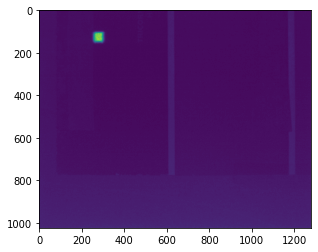

In [9]:
# Display speckle image
myLinearStage.move_to(40)
image = pattern[:,:,0]
image[0, 0] = 0  # top-left corner
image[height - 2, 0] = 0  # bottom-left
image[0, width - 2] = 0  # top-right
image[height - 2, width - 2] = 0  # bottom-right

window_name = 'projector'
cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)
cv2.moveWindow(window_name, screen.x - 1, screen.y - 1)
cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN,
                      cv2.WINDOW_FULLSCREEN)
cv2.imshow(window_name, image)

cv2.waitKey(500)

# Take picture of object w/ speckle pattern
#     scene[:,:,i] = c.capture().copy()
img = c.capture().copy()
# c.live_image()

cv2.destroyWindow(window_name)

plt.imshow(img)

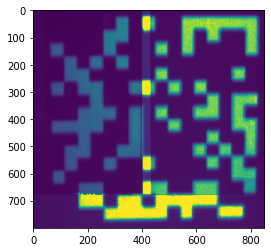

In [14]:
imgc = img[100:900,200:1050]
plt.imshow(imgc)

In [ ]:
head_mean = np.zeros((1024,720))
for i in range(1024):
    for j in range(720):
        head_mean[i,j] = head[i,j,:].mean()
        

plt.imshow(head_mean, cmap = 'gray')
plt.colorbar()

In [ ]:
myLinearStage.move_to(20)
c.live_image()

In [17]:
c.close()

ThorCam closed successfully.
